In [ ]:
import pandas as pd
import networkx as nx
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import os

In [ ]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score

In [ ]:
from IPython.display import display, HTML

%matplotlib inline

Установим Node2Vec для визуализации графа.

In [ ]:
pip install Node2Vec

In [ ]:
import random
from node2vec import Node2Vec
from tqdm import tqdm
import re

# Задание - Предсказание уровня экспрессии белка

<img src='https://www.researchgate.net/publication/313504607/figure/fig3/AS:459880453677066@1486655453033/Protein-protein-interaction-PPI-network-of-DEGs-by-STRING-The-interaction-score-was.png'>




<div class="alert alert-info">
<b>Про биологию</b>
    
Экспрессия — процесс, в ходе которого наследственная информация от гена (последовательности нуклеотидов ДНК) преобразуется в функциональный продукт — белок. Уровнем экспрессии называют - количество белка, производящегося в этом процессе. Чем выше экспрессия белка, тем большее количество этого белка появляется в клетках человека. 
    
    

<div class="alert alert-info">    
<b>Важность задачи</b>
    
Существует множество причин необходимости в знании уровня экспресии белка. Например - это позволяет ученым разрабатывать лекарственные средства и оптимизировать их разработку. Теперь вам предстоит побыть в роли биоинформатика и помочь науке!
    
</div>


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой граф взаимойдествия белков. Где узлы это белки, взаимодействие между белками это ребро. 

Для каждого белка известен уровень его экспрессии. Ниже приведен список ребер `edges`. Информация по экспрессии белков, разбитая на `train` и `test`.
   
    
</div>

In [ ]:
#Список ребер графа 

edges = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Otus_HW_protein_expression/main/edges.csv", sep=",") # Подгрузим данные
edges.head()

,node_1,node_2
0,344,50
1,344,153
2,344,532
3,344,679
4,344,986


In [ ]:
#Подгрузим тренирочную выборку
train = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Otus_HW_protein_expression/main/train.csv", sep=",") # Подгрузим данные
train.head()

,target,node
0,0.251968,11142
1,0.689541,2243
2,0.678245,15514
3,0.272500,20944
4,0.248888,8721


In [ ]:
# Подгрузим отложенную выборку для валидации
test = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Otus_HW_protein_expression/main/test.csv", sep=",")
test.head()

,target,node
0,0.279231,817
1,0.380795,9574
2,0.686527,1607
3,0.303594,4782
4,0.367374,24125


<div class="alert alert-info">
<b>Про Задачу</b>
    
Вам предлагается предсказать экспрессию белков (`target`) по приведенным данным для отложенной выборки. Ответы в отложенной выборке `test` даны вам для самостоятельной валидации.


    
   
    

<div class="alert alert-info">
<b>Замечание и комментарии</b>
    
    

По ряду причин датасет был упрощен так, чтобы выполнялись следующие условия:
* у графа одна компонента связанности. 
* удалены слишком крупные хабы
* плотность связей графа уменьшена
* решить задачу можно классическими ML подходами
    
   

<div class="alert alert-info">
<b>Оценка результатов</b>
    


Оценка точности модели будет оцениваться по метрике MSE на отложенной выборке `test`
        
</div>

<div class="alert alert-info">
<b>Автор задачи</b>

По всем дополнительным вопросами писать Александру Миленькину
* Телеграмм: Alerin75infskin
* Почта: milenkin.aa@phystech.edu
        
</div>

In [ ]:
edges.shape

(594174, 2)

Выделим перечень узлов для тренировочного датасета

In [ ]:
train_node=list(train.node)

Создаем направленный граф для ребер из датасета edges

In [ ]:
G = nx.DiGraph()

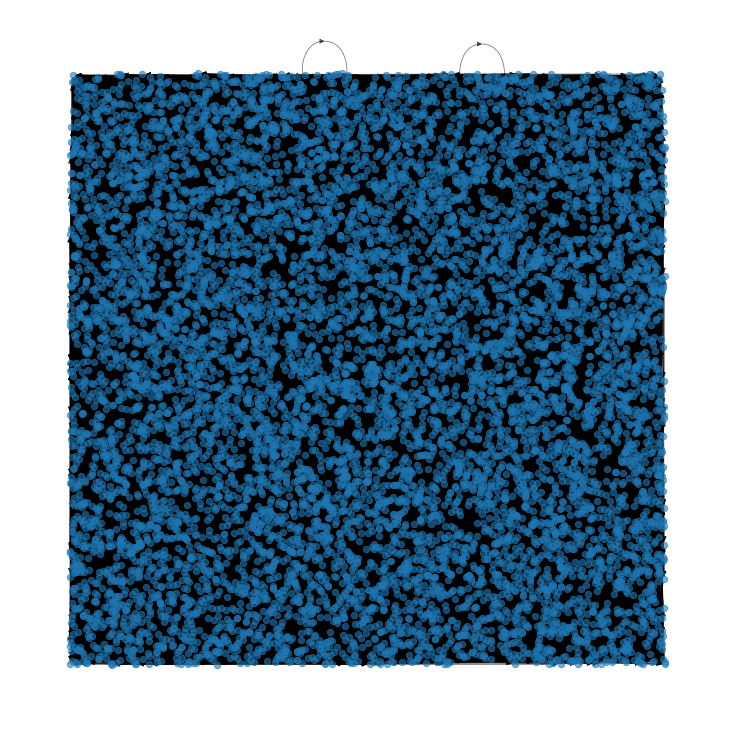

In [ ]:
G = nx.from_pandas_edgelist(edges, "node_1", "node_2", create_using=nx.DiGraph())
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G , with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

Определим количество входящих и исходящих узлов для каждого из узлов из train датасета.

In [ ]:
X_neighbors=[]
for node_id in train.node.values:
  nm=[]
  for m,i in enumerate(G.predecessors(node_id)): # узел предшественник
    pass
  nm.append(m+1)
  for n,i in enumerate(G.successors(node_id)): # узел преемник
    pass
  nm.append(n+1)
  X_neighbors.append(nm)

Например, для сотого узла получится следующее пара значений:

In [ ]:
X_neighbors[100]

[30, 37]

Задание целевой переменной.

In [ ]:
targets=train.target.values

Разделение на test и train.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X_neighbors), targets, 
                                                test_size = 0.25, 
                                                random_state = 27)

### Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)#,sample_weight=True)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = reg.predict(X_test)

In [ ]:
#explained_variance_score(y_test, predictions)
#mean_absolute_error(y_test, predictions)
mse=mean_squared_error(y_test, predictions)
r2=r2_score(y_test, predictions)
print(mse,r2)

0.021401418456321365 0.9573462860780102


<div class="alert alert-info">
<b>Оценка результатов</b>
    


Оценка точности модели будет оцениваться по метрике MSE на отложенной выборке `test`
        
</div>

In [ ]:
# Подгрузим отложенную выборку для валидации
test = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Otus_HW_protein_expression/main/test.csv", sep=",")
test.head()

,target,node
0,0.279231,817
1,0.380795,9574
2,0.686527,1607
3,0.303594,4782
4,0.367374,24125


In [ ]:
test_node=list(test.node)
targets=test.target.values

In [ ]:
X_test_neighbors=[]
for node_id in test.node.values:
  nm=[]
  for m,i in enumerate(G.predecessors(node_id)):
    pass
  nm.append(m+1)
  for n,i in enumerate(G.successors(node_id)):
    pass
  nm.append(n+1)
  X_test_neighbors.append(nm)

In [ ]:
predictions = reg.predict(np.array(X_test_neighbors))

In [ ]:
mse=mean_squared_error(targets, predictions)
r2=r2_score(targets, predictions)
print(mse,r2)

0.020130965045906328 0.9732331191420842


Получены хорошие значения MSE и R2.

### RandomForesterRegressor и Стекинг

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {   'criterion': ['mse', 'mae'],
             'max_depth': list(range(5, 20, 1)),
             'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_leaf': list(range(1, 8, 1)),
             'min_samples_split': list(range(2, 8, 1)),
             'n_estimators': list(range(5, 20, 1)),
             'n_jobs': [-1],
             'random_state': [13]}

rf_regr = RandomizedSearchCV(RandomForestRegressor(), params, cv=6, n_jobs=-1, n_iter=10, random_state=13)
rf_regr =  rf_regr.fit(X_train, y_train).best_estimator_
rf_regr

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=-1, oob_score=False,
                      random_state=13, verbose=0, warm_start=False)

In [ ]:
predictions = rf_regr.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test, predictions)
r2=r2_score(y_test, predictions)
print(mse,r2)

0.03589267762152342 0.9284647414241619


Похуже результаты, чем у Линейной регрессии.

Применим **стекинг**.


In [ ]:
Stack_regressor = StackingRegressor(
    [
        ('dt', RandomForestRegressor(n_estimators=28, min_samples_leaf=5, min_samples_split=7, max_depth=8,
                                     random_state=13)),
        ('svr', SVR())
    ],
Ridge(alpha=10.8, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=None, solver='sag', tol=0.001))

In [ ]:
Stack_regressor = Stack_regressor.fit(X_train, y_train)

In [ ]:
predictions = Stack_regressor.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test, predictions)
r2=r2_score(y_test, predictions)
print(mse,r2)

0.04530432320065944 0.9097070296917859
